In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#creat function to simulate normal distribution plot randomly given mean and sigma
def simret(n, mu, sigma): # mean and standard deviation
    """
    n: the number of random pick
    mu: mean
    sigma: stand deviation
    """
    from scipy.stats import norm
    np.random.seed(13)
    s = np.random.normal(mu, sigma, n)
    fig, ax = plt.subplots()
    xmin, xmax = -3 * sigma, 3 * sigma
    ax.set_xlim(xmin, xmax)
    ax.hist(s, bins=50, alpha=0.5, density=True)
    xgrid = np.linspace(xmin, xmax, 200)
    ax.plot(xgrid, norm.pdf(xgrid-mu, scale=sigma), 'k-', lw=2, label=r'$N(\mu, \sigma^2)$',color='orange')
    ax.legend()   
    plt.show()

[*********************100%***********************]  1 of 1 downloaded


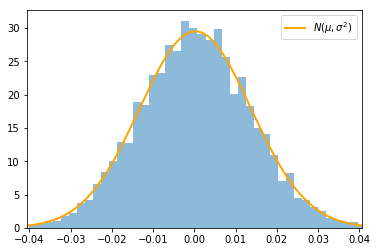

In [3]:
#get Nikkei225 daily returns data and plot the distribution
pd.core.common.is_list_like = pd.api.types.is_list_like

from pandas_datareader import data, wb

import datetime

import fix_yahoo_finance as yf
yf.pdr_override()

start = datetime.datetime(1978, 7, 30)

end = datetime.datetime(2018, 7, 30)

Nikkei=data.get_data_yahoo('^N225',start,end)

Nikkei['Return']=Nikkei['Close'].pct_change(1)

simret(5000, mu=Nikkei['Return'].mean(), sigma=Nikkei['Return'].std())

In [4]:
#creat function to generate lognormal distribution plot randomly given mean and sigma
def lognormalplot(n, mu, sigma): # mean and standard deviation
    """
    n: the number of random pick
    mu: mean
    sigma: stand deviation
    """
    np.random.seed(13)
    import scipy.stats 
    s = np.random.lognormal(mu, sigma, n)
    fig, ax = plt.subplots()
    xmin, xmax = s.min(), s.max()
    ax.set_xlim(xmin, xmax)
    ax.hist(s, bins=50, alpha=0.5, density=True)
    pd.Series(s).plot(kind='kde',color='gold' ,lw=2, label=r'$N(\mu, \sigma^2)$')
    ax.legend()   
    plt.show()

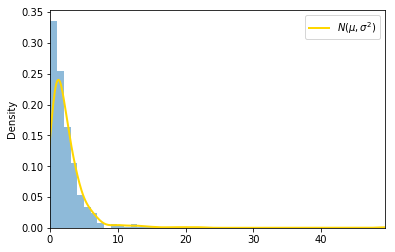

In [5]:
#if daily returns~N(mean,sigma^2), lognormal distribution plot should be similar to this plot
lognormalplot(500,0.5,1.0)

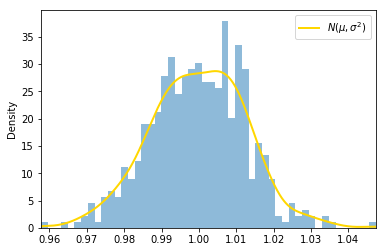

In [6]:
#simulating the lognormal distribution given mean and std
lognormalplot(500, mu=Nikkei['Return'].mean(), sigma=Nikkei['Return'].std())

In [7]:
#simulate a random walk in Brownian Motion
def Brownian(N, Start, mu, sigma, seed=13 ):
    """
    N: years 
    Start: start price of the random walk
    mu: expected daily return of the returns
    sigma:standard deviation
    seed:random seed, default=13
    """
    np.random.seed(seed)                         
    dt = 1./252*N                                    # time step
    b = np.random.normal(0., 1., int(252*N))*np.sqrt(dt) # brownian increments
    W = np.cumsum(b) # brownian path
    Price=[Start]
    for i in range(int(252*N)):
        New=Start*np.exp((mu-0.5*sigma**2)*dt*(i+1)+sigma*W[i])#price at step i
        Price.append(New)
    pd.Series(Price).plot(figsize=(12,8), title='Brownian Random Walk Simulation',color='green')
    plt.ylabel('price')
    plt.xlabel('trading days ahead')

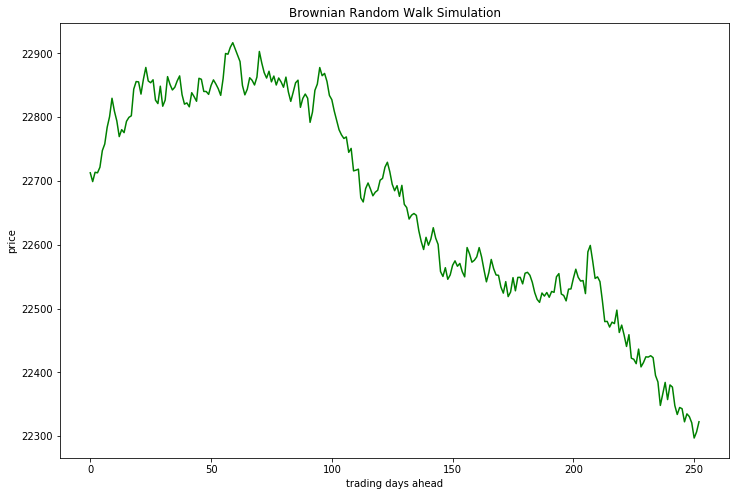

In [8]:
#simulate Nikkei225's path in the coming 12 months
Brownian(1,Nikkei['Close'].values[-1],Nikkei['Return'].mean(), sigma=Nikkei['Return'].std())